In [1]:
import pandas as pd
import numpy as np

In [2]:
part_d_df = pd.read_csv('data/part_d_2014.csv', low_memory=False)
exclusion_df = pd.read_csv('data/exclusion_list_2015.csv', low_memory=False)
print("The data has a size of {}".format(part_d_df.shape))

The data has a size of (24120618, 21)


In [3]:
part_d_df.head(2)

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,...,total_30_day_fill_count,total_day_supply,total_drug_cost,bene_count_ge65,bene_count_ge65_suppress_flag,total_claim_count_ge65,ge65_suppress_flag,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
0,1003046624,TAN,THEODORE CONRAD,DOVER,DE,Internal Medicine,S,PANTOPRAZOLE SODIUM,PANTOPRAZOLE SODIUM,NaN,...,72.0,2160,828.14,NaN,*,18.0,NaN,36.0,1080.0,632.5
1,1003046624,TAN,THEODORE CONRAD,DOVER,DE,Internal Medicine,S,POTASSIUM CHLORIDE,POTASSIUM CHLORIDE,NaN,...,43.0,1188,775.93,NaN,*,NaN,*,NaN,NaN,NaN


In [4]:
exclusion_df.head(2)
len(exclusion_df)

628

In [5]:
# reorganize data columns
part_d_df = part_d_df[['npi', 'nppes_provider_city','nppes_provider_state', 'specialty_description', 'description_flag',\
                        'drug_name', 'generic_name', 'bene_count', 'total_claim_count','total_day_supply', \
                        'total_drug_cost', 'bene_count_ge65', 'total_claim_count_ge65', 'total_day_supply_ge65',\
                        'total_drug_cost_ge65']]

# assigning exclusion (False = 0, True = 1)
exclusion_npi = exclusion_df['NPI'].values.tolist()

part_d_df['is_excluded'] = 0
part_d_df.loc[part_d_df['npi'].isin(exclusion_npi), 'is_excluded'] = 1

# get US data to analyze
states = ['AK', 'AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', \
          'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', \
          'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', \
          'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', \
          'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI',' WY']

part_d_df = part_d_df[part_d_df['nppes_provider_state'].isin(states)]

print("The data has a size of {}".format(part_d_df.shape))

The data has a size of (23697142, 16)


In [6]:
len(exclusion_df['NPI'].unique())

624

In [7]:
len(exclusion_df['SPECIALTY'].unique())

60

In [8]:
len(part_d_df.loc[part_d_df['npi'].isin(exclusion_npi)])

5897

In [9]:
part_d_df.loc[part_d_df['is_excluded']==1].head(2)

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
96341,1003845306,FT LAUDERDALE,FL,Internal Medicine,S,BETHANECHOL CHLORIDE,BETHANECHOL CHLORIDE,NaN,12,365,598.9,0.0,0.0,0.0,0.0,1
96342,1003845306,FT LAUDERDALE,FL,Internal Medicine,S,CITALOPRAM HBR,CITALOPRAM HYDROBROMIDE,NaN,17,510,419.5,NaN,17.0,510.0,419.5,1


In [10]:
# Top 20 states which has the most prescribers
part_d_df_state_count = part_d_df.groupby('nppes_provider_state').count().sort_values('npi', ascending=False).iloc[0:20]
part_d_df_state_count

,npi,nppes_provider_city,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
nppes_provider_state,,,,,,,,,,,,,,,
CA,2314491,2314491,2314491,2314491,2314491,2314491,896015,2314491,2314491,2314491,335778,1375974,1375974,1375974,2314491
NY,1650337,1650337,1650337,1650337,1650337,1650337,594588,1650337,1650337,1650337,223322,986032,986032,986032,1650337
FL,1611230,1611230,1611230,1611230,1611230,1611230,701458,1611230,1611230,1611230,232579,917126,917126,917126,1611230
TX,1472194,1472194,1472194,1472194,1472194,1472194,600479,1472194,1472194,1472194,192123,819145,819145,819145,1472194
PA,1229100,1229100,1229100,1229100,1229100,1229100,435172,1229100,1229100,1229100,160467,742902,742902,742902,1229100
OH,1001853,1001853,1001853,1001853,1001853,1001853,390038,1001853,1001853,1001853,141942,586328,586328,586328,1001853
NC,876296,876296,876296,876296,876296,876296,331501,876296,876296,876296,115711,504557,504557,504557,876296
IL,866555,866555,866555,866555,866555,866555,305131,866555,866555,866555,114599,519239,519239,519239,866555
MI,824210,824210,824210,824210,824210,824210,332686,824210,824210,824210,116965,441136,441136,441136,824210


In [11]:
# exclusion and non-exclusion prescribers
prescribers = part_d_df.groupby('is_excluded').count().sort_values('npi', ascending=False).iloc[0:2]
prescribers

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
is_excluded,,,,,,,,,,,,,,,
0,23691245,23691245,23691245,23691245,23691245,23691245,23691245,8914456,23691245,23691245,23691245,3251550,13760070,13760070,13760070
1,5897,5897,5897,5897,5897,5897,5897,2107,5897,5897,5897,1082,3465,3465,3465


In [12]:
# export exclusion providers data to do statistics analysis, run once when needed by uncommenting two lines below
part_d_df_exclusion = part_d_df[part_d_df['is_excluded'] == 1]
#part_d_df_exclusion.to_csv('exclusion2017.csv')

In [13]:
len(part_d_df_exclusion['npi'].unique())

152

In [14]:
part_d_df_exclusion[['npi']].to_csv('2014_part_d_e_npi.csv')

In [15]:
len(part_d_df_exclusion['drug_name'].unique())

670

In [16]:
len(part_d_df_exclusion['specialty_description'].unique())

33

In [17]:
part_d_df_exclusion['specialty_description'].unique()

array(['Internal Medicine', 'General Practice', 'Nurse Practitioner',
       'Family Medicine', 'Specialist', 'Psychiatry & Neurology',
       'Emergency Medicine', 'Otolaryngology', 'Anesthesiology',
       'Family Practice', 'Medical Oncology', 'Dentist',
       'Obstetrics/Gynecology', 'Legal Medicine',
       'Physical Medicine and Rehabilitation', 'Psychiatry',
       'Dermatology', 'Gastroenterology',
       'Osteopathic Manipulative Medicine', 'Podiatry',
       'Pediatric Medicine', 'Hematology/Oncology', 'Orthopedic Surgery',
       'Ophthalmology', 'Physician Assistant', 'Optometry',
       'General Surgery', 'Interventional Pain Management',
       'Neurosurgery', 'Urology', 'Nuclear Medicine', 'Neurology',
       'Cardiology'], dtype=object)

In [18]:
# Top 10 NPIs which are the most excluded prescribers
part_d_df_exclusion_npi_count = part_d_df_exclusion.groupby('npi').count().sort_values('drug_name', ascending=False).iloc[0:10]
part_d_df_exclusion_npi_count.reset_index(level=["npi"], inplace=True)
part_d_df_exclusion_npi_count

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
0,1841206307,316,316,316,316,316,316,158,316,316,316,63,231,231,231,316
1,1982637856,283,283,283,283,283,283,146,283,283,283,77,188,188,188,283
2,1053458018,257,257,257,257,257,257,116,257,257,257,34,171,171,171,257
3,1891780425,203,203,203,203,203,203,97,203,203,203,41,126,126,126,203
4,1891722237,202,202,202,202,202,202,79,202,202,202,16,119,119,119,202
5,1053499673,189,189,189,189,189,189,83,189,189,189,33,111,111,111,189
6,1336203603,146,146,146,146,146,146,56,146,146,146,12,77,77,77,146
7,1427090562,144,144,144,144,144,144,48,144,144,144,31,97,97,97,144
8,1568410496,141,141,141,141,141,141,42,141,141,141,18,71,71,71,141
9,1700869864,116,116,116,116,116,116,22,116,116,116,38,76,76,76,116


In [19]:
# Top 10 states which has the most excluded prescribers
part_d_df_exclusion_state_count = part_d_df_exclusion.groupby('nppes_provider_state').count().sort_values('npi', ascending=False).iloc[0:20]
part_d_df_exclusion_state_count.reset_index(level=["nppes_provider_state"], inplace=True)
part_d_df_exclusion_state_count

,nppes_provider_state,npi,nppes_provider_city,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
0,CA,1029,1029,1029,1029,1029,1029,329,1029,1029,1029,154,581,581,581,1029
1,NJ,816,816,816,816,816,816,343,816,816,816,111,488,488,488,816
2,FL,615,615,615,615,615,615,277,615,615,615,162,388,388,388,615
3,MI,578,578,578,578,578,578,188,578,578,578,77,289,289,289,578
4,NY,420,420,420,420,420,420,145,420,420,420,92,277,277,277,420
5,TN,386,386,386,386,386,386,132,386,386,386,92,246,246,246,386
6,IL,373,373,373,373,373,373,138,373,373,373,38,215,215,215,373
7,WA,354,354,354,354,354,354,161,354,354,354,63,263,263,263,354
8,AL,214,214,214,214,214,214,78,214,214,214,54,117,117,117,214
9,KY,190,190,190,190,190,190,83,190,190,190,33,111,111,111,190


In [20]:
# Top 20 specialties which has the most excluded prescribers
part_d_df_exclusion_specialty_count = part_d_df_exclusion.groupby('specialty_description').count().sort_values('npi', ascending=False).iloc[0:20]
part_d_df_exclusion_specialty_count.reset_index(level=["specialty_description"], inplace=True)
part_d_df_exclusion_specialty_count

,specialty_description,npi,nppes_provider_city,nppes_provider_state,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
0,Internal Medicine,2442,2442,2442,2442,2442,2442,884,2442,2442,2442,345,1475,1475,1475,2442
1,Family Practice,1181,1181,1181,1181,1181,1181,463,1181,1181,1181,203,702,702,702,1181
2,General Practice,552,552,552,552,552,552,203,552,552,552,102,316,316,316,552
3,Psychiatry,398,398,398,398,398,398,94,398,398,398,146,258,258,258,398
4,Nurse Practitioner,284,284,284,284,284,284,91,284,284,284,41,145,145,145,284
5,Psychiatry & Neurology,139,139,139,139,139,139,39,139,139,139,51,83,83,83,139
6,General Surgery,95,95,95,95,95,95,53,95,95,95,17,46,46,46,95
7,Physical Medicine and Rehabilitation,88,88,88,88,88,88,45,88,88,88,22,55,55,55,88
8,Obstetrics/Gynecology,84,84,84,84,84,84,21,84,84,84,37,56,56,56,84
9,Interventional Pain Management,76,76,76,76,76,76,38,76,76,76,29,42,42,42,76


After full US dataset analysis, will use NJ data to do detailed analysis

In [21]:
part_d_df_small=part_d_df[part_d_df['nppes_provider_state']=='NJ']

In [22]:
len(part_d_df_small)

650274

In [23]:
# exclusion and non-exclusion prescribers
prescribers = part_d_df_small.groupby('is_excluded').count().sort_values('npi', ascending=False).iloc[0:2]
prescribers

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
is_excluded,,,,,,,,,,,,,,,
0,649458,649458,649458,649458,649458,649458,649458,237876,649458,649458,649458,91371,391158,391158,391158
1,816,816,816,816,816,816,816,343,816,816,816,111,488,488,488


In [24]:
# Top specialties which has the most excluded prescribers in small dataset
part_d_df_small_exclusion = part_d_df_small[part_d_df_small['is_excluded'] == 1]
part_d_df_small_exclusion_specialty_count = part_d_df_small_exclusion.groupby('specialty_description').count().sort_values('npi', ascending=False).iloc[0:20]
part_d_df_small_exclusion_specialty_count.reset_index(level=["specialty_description"], inplace=True)
part_d_df_small_exclusion_specialty_count

,specialty_description,npi,nppes_provider_city,nppes_provider_state,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
0,Internal Medicine,613,613,613,613,613,613,248,613,613,613,63,367,367,367,613
1,Family Practice,107,107,107,107,107,107,63,107,107,107,22,62,62,62,107
2,Psychiatry & Neurology,84,84,84,84,84,84,30,84,84,84,25,50,50,50,84
3,Gastroenterology,9,9,9,9,9,9,2,9,9,9,1,7,7,7,9
4,Ophthalmology,3,3,3,3,3,3,0,3,3,3,0,2,2,2,3


In [25]:
# add a new field called drug_count to the dataframe
part_d_df_small["drug_count"] = 1

# use the groupby() and agg() methods to create a new dataframe. use numpy sum method to populate values
prescriber_specialty_df = part_d_df_small.groupby(["npi","specialty_description"]).agg({"total_claim_count": np.sum,  "drug_count": np.sum})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
prescriber_specialty_df.head()

,,total_claim_count,drug_count
npi,specialty_description,,
1003001678,Nurse Practitioner,14,1
1003002072,Urology,997,19
1003002858,Nurse Practitioner,2363,53
1003011891,Gastroenterology,33,2
1003012410,Family Practice,394,22


In [27]:
# to merge the tables we need to flatten the indices.
prescriber_specialty_df.reset_index(level=["npi","specialty_description"], inplace=True)

In [28]:
prescriber_specialty_df.head()

,npi,specialty_description,total_claim_count,drug_count
0,1003001678,Nurse Practitioner,14,1
1,1003002072,Urology,997,19
2,1003002858,Nurse Practitioner,2363,53
3,1003011891,Gastroenterology,33,2
4,1003012410,Family Practice,394,22


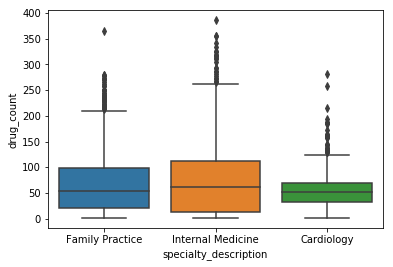

In [29]:
# show that different medical specialties prescribe different numbers of drugs
import seaborn as sb
%matplotlib inline

sb.boxplot(x="specialty_description", y="drug_count", 
           data=prescriber_specialty_df
           [
           (prescriber_specialty_df["specialty_description"] == "Internal Medicine") |
           (prescriber_specialty_df["specialty_description"] == "Family Practice") |
           (prescriber_specialty_df["specialty_description"] == "Cardiology")
           ]
          )

In [30]:
# User pandas crosstab function to create a dataframe where each row is a prescriber identified by their NPI, 
# the columns are the drug generic names, the values are the sum of total_claim_count
npi_generic_cross_df = pd.crosstab(part_d_df_small["npi"], part_d_df_small["generic_name"], values=part_d_df_small["total_claim_count"], 
                                  aggfunc=np.sum)

In [31]:
# To replace the NaN (not a number) from the cells with zero the fillna() method is used.
npi_generic_cross_df = npi_generic_cross_df.fillna(0)

In [32]:
npi_generic_cross_df.head()

generic_name,0.9 % SODIUM CHLORIDE,AA 4.25%/CALCIUM/LYTES/DEX 10%,ABACAVIR SULFATE,ABACAVIR SULFATE/LAMIVUDINE,ABACAVIR/DOLUTEGRAVIR/LAMIVUDI,ABACAVIR/LAMIVUDINE/ZIDOVUDINE,ABATACEPT,ABATACEPT/MALTOSE,ABIRATERONE ACETATE,ACAMPROSATE CALCIUM,...,ZIDOVUDINE,ZILEUTON,ZINC ACETATE,ZIPRASIDONE HCL,ZOLEDRONIC ACID,ZOLEDRONIC ACID/MANNITOL&WATER,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE,ZOSTER VACCINE LIVE/PF
npi,,,,,,,,,,,,,,,,,,,,,
1003001678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003002072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003002858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0
1003011891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003012410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# use npi to merge two tables prescriber_specialty_df and npi_generic_cross_df
prescriber_specialty_generic_df = pd.merge(prescriber_specialty_df, npi_generic_cross_df.reset_index(level=["npi"]), on="npi")

In [34]:
prescriber_specialty_generic_df.head()

,npi,specialty_description,total_claim_count,drug_count,0.9 % SODIUM CHLORIDE,AA 4.25%/CALCIUM/LYTES/DEX 10%,ABACAVIR SULFATE,ABACAVIR SULFATE/LAMIVUDINE,ABACAVIR/DOLUTEGRAVIR/LAMIVUDI,ABACAVIR/LAMIVUDINE/ZIDOVUDINE,...,ZIDOVUDINE,ZILEUTON,ZINC ACETATE,ZIPRASIDONE HCL,ZOLEDRONIC ACID,ZOLEDRONIC ACID/MANNITOL&WATER,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE,ZOSTER VACCINE LIVE/PF
0,1003001678,Nurse Practitioner,14,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1003002072,Urology,997,19,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1003002858,Nurse Practitioner,2363,53,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0
3,1003011891,Gastroenterology,33,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1003012410,Family Practice,394,22,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
prescriber_specialty_generic_df = prescriber_specialty_generic_df.sort_values(by=["specialty_description", "npi"])

In [36]:
prescriber_specialty_generic_df.head()

,npi,specialty_description,total_claim_count,drug_count,0.9 % SODIUM CHLORIDE,AA 4.25%/CALCIUM/LYTES/DEX 10%,ABACAVIR SULFATE,ABACAVIR SULFATE/LAMIVUDINE,ABACAVIR/DOLUTEGRAVIR/LAMIVUDI,ABACAVIR/LAMIVUDINE/ZIDOVUDINE,...,ZIDOVUDINE,ZILEUTON,ZINC ACETATE,ZIPRASIDONE HCL,ZOLEDRONIC ACID,ZOLEDRONIC ACID/MANNITOL&WATER,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE,ZOSTER VACCINE LIVE/PF
14740,1639138928,Acupuncturist,35,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2078,1083895114,Addiction Medicine,249,10,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14847,1639295470,Addiction Medicine,29,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18871,1801833520,Addiction Medicine,11,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138,1003878943,Allergy/Immunology,131,6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# Since the data has been resorted by specialty_desc and npi, index needs to be updated to reflect new order of data
prescriber_specialty_generic_df=prescriber_specialty_generic_df.reset_index(drop=True)
prescriber_specialty_generic_df.head()

,npi,specialty_description,total_claim_count,drug_count,0.9 % SODIUM CHLORIDE,AA 4.25%/CALCIUM/LYTES/DEX 10%,ABACAVIR SULFATE,ABACAVIR SULFATE/LAMIVUDINE,ABACAVIR/DOLUTEGRAVIR/LAMIVUDI,ABACAVIR/LAMIVUDINE/ZIDOVUDINE,...,ZIDOVUDINE,ZILEUTON,ZINC ACETATE,ZIPRASIDONE HCL,ZOLEDRONIC ACID,ZOLEDRONIC ACID/MANNITOL&WATER,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE,ZOSTER VACCINE LIVE/PF
0,1639138928,Acupuncturist,35,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1083895114,Addiction Medicine,249,10,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1639295470,Addiction Medicine,29,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1801833520,Addiction Medicine,11,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1003878943,Allergy/Immunology,131,6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# Top 10 NPIs which are the most excluded prescribers
part_d_df_small_exclusion_npi_count = part_d_df_small_exclusion.groupby('npi').count().sort_values('drug_name', ascending=False).iloc[0:10]
part_d_df_small_exclusion_npi_count

,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
npi,,,,,,,,,,,,,,,
1053458018,257,257,257,257,257,257,116,257,257,257,34,171,171,171,257
1891722237,202,202,202,202,202,202,79,202,202,202,16,119,119,119,202
1720159916,107,107,107,107,107,107,63,107,107,107,22,62,62,62,107
1427098268,100,100,100,100,100,100,41,100,100,100,7,50,50,50,100
1932282845,71,71,71,71,71,71,30,71,71,71,21,42,42,42,71
1558364166,25,25,25,25,25,25,5,25,25,25,3,16,16,16,25
1578605812,19,19,19,19,19,19,1,19,19,19,1,6,6,6,19
1386795292,13,13,13,13,13,13,0,13,13,13,4,8,8,8,13
1285712950,10,10,10,10,10,10,6,10,10,10,2,5,5,5,10


In [65]:
# Based on analyzed result, the interested excluded npi is 1053458018
# we need to find out the position of 1053360966 based on this script, the result is 9762
# update the position of the rest of the scripts using 9762
prescriber_specialty_generic_df.loc[prescriber_specialty_generic_df['npi'] == 1053458018]

,npi,specialty_description,total_claim_count,drug_count,0.9 % SODIUM CHLORIDE,AA 4.25%/CALCIUM/LYTES/DEX 10%,ABACAVIR SULFATE,ABACAVIR SULFATE/LAMIVUDINE,ABACAVIR/DOLUTEGRAVIR/LAMIVUDI,ABACAVIR/LAMIVUDINE/ZIDOVUDINE,...,ZIDOVUDINE,ZILEUTON,ZINC ACETATE,ZIPRASIDONE HCL,ZOLEDRONIC ACID,ZOLEDRONIC ACID/MANNITOL&WATER,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE,ZOSTER VACCINE LIVE/PF
9762,1053458018,Internal Medicine,26054,257,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,472.0,0.0,0.0


In [40]:
#part_d_df_small_exclusion[part_d_df_small_exclusion['specialty_description'] == 'Family Practice']

In [66]:
part_d_df_exclusion.loc[part_d_df_exclusion['npi'] == 1053458018].head()

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
1346117,1053458018,WEST NEW YORK,NJ,Internal Medicine,S,ACETAMINOPHEN-CODEINE,ACETAMINOPHEN WITH CODEINE,NaN,23,327,175.07,NaN,NaN,NaN,NaN,1
1346118,1053458018,WEST NEW YORK,NJ,Internal Medicine,S,ACTONEL,RISEDRONATE SODIUM,14.0,52,1652,11135.75,NaN,NaN,NaN,NaN,1
1346119,1053458018,WEST NEW YORK,NJ,Internal Medicine,S,ACYCLOVIR,ACYCLOVIR,NaN,20,309,9230.74,NaN,NaN,NaN,NaN,1
1346120,1053458018,WEST NEW YORK,NJ,Internal Medicine,S,ADVAIR DISKUS,FLUTICASONE/SALMETEROL,28.0,168,5700,55303.64,NaN,124.0,4380.0,42022.17,1
1346121,1053458018,WEST NEW YORK,NJ,Internal Medicine,S,AGGRENOX,ASPIRIN/DIPYRIDAMOLE,NaN,24,720,7797.20,NaN,24.0,720.0,7797.20,1


Shift from using the Pandas dataframe object to the `numpy.array`. Slice off the columns that are not related to the number of filled prescriptions and convert this to a matrix. The `iloc()` method slices a dataframe by the column and the method `as_matrix()` converts the dataframe into a numpy array.

In [67]:
pf_matrix = prescriber_specialty_generic_df.iloc[: , 4: ].as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [68]:
pf_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [69]:
identifiers_matrix = prescriber_specialty_generic_df.iloc[:,0:2].as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [70]:
generic_array = prescriber_specialty_generic_df.columns[4:]

In [71]:
generic_array

Index(['0.9 % SODIUM CHLORIDE', 'AA 4.25%/CALCIUM/LYTES/DEX 10%',
       'ABACAVIR SULFATE', 'ABACAVIR SULFATE/LAMIVUDINE',
       'ABACAVIR/DOLUTEGRAVIR/LAMIVUDI', 'ABACAVIR/LAMIVUDINE/ZIDOVUDINE',
       'ABATACEPT', 'ABATACEPT/MALTOSE', 'ABIRATERONE ACETATE',
       'ACAMPROSATE CALCIUM',
       ...
       'ZIDOVUDINE', 'ZILEUTON', 'ZINC ACETATE', 'ZIPRASIDONE HCL',
       'ZOLEDRONIC ACID', 'ZOLEDRONIC ACID/MANNITOL&WATER', 'ZOLMITRIPTAN',
       'ZOLPIDEM TARTRATE', 'ZONISAMIDE', 'ZOSTER VACCINE LIVE/PF'],
      dtype='object', length=1150)

In [72]:
# to compute the distance between a vector representing the drugs that a prescriber prescribes 
# we need to import the scipy.spatial library.
import scipy.spatial

Normalize the claim count of prescriptions by the total number of claims for the prescriber. Each entry now represent the percentage of total claims that are associated with the prescriber.

In [73]:
np.reshape(np.sum(pf_matrix,1), (pf_matrix.shape[0],1))

array([[ 35.],
       [249.],
       [ 29.],
       ...,
       [ 66.],
       [230.],
       [284.]])

In [74]:
normalized_pf_matrix = pf_matrix / np.reshape(np.sum(pf_matrix,1), (pf_matrix.shape[0],1))

In [75]:
normalized_pf_matrix.shape

(23515, 1150)

Use the euclidean distance to compute the distance between two prescribers. The results of the pdist() function need to be placed into square form. 

In [76]:
prescriber_dist = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(normalized_pf_matrix, "euclidean"))

In [77]:
prescriber_dist.shape

(23515, 23515)

As we have sorted the prescribers by their specialty then we expect to see some spatial patterns in the distance matrix. A matrix can be visualized using the `matplotlib` library.

In [78]:
import matplotlib.pyplot as plt

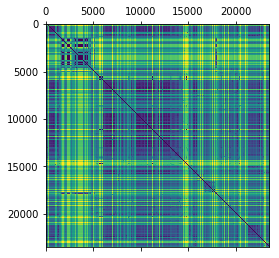

In [79]:
plt.matshow(prescriber_dist)

In [80]:
prescriber_specialty_generic_df.iloc[9762,0:4]

npi                             1053458018
specialty_description    Internal Medicine
total_claim_count                    26054
drug_count                             257
Name: 9762, dtype: object

In [81]:
providers_sorted = np.lexsort((prescriber_dist[:,9762].tolist(),))

In [82]:
# The prescriber referenced at position 7396 is an Internal Medicine. 
# We can now calculate the prescribers most similar to this Internal Medicine.
prescriber_dist[9762,:]
np.sort(prescriber_dist[9762])[providers_sorted[0:16]]

array([0.34904038, 0.3897323 , 0.24423084, 0.45126161, 0.38900444,
       0.28611086, 0.33831694, 0.36248908, 0.34448026, 0.45767893,
       0.43251349, 0.34641963, 0.44229602, 0.37574395, 0.43839794,
       0.42758975])

In [83]:
# plotting the distances we can see that prescribers most like are probably also Internal Medicine.
#plt.scatter(np.arange(prescriber_dist.shape[0]),prescriber_dist[7396,:])

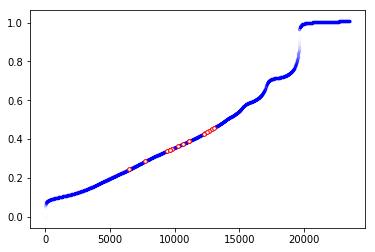

In [84]:
dis_range = np.arange(prescriber_dist.shape[0])
#plt.scatter(np.arange(prescriber_dist.shape[0]),np.sort(prescriber_dist[7396,:]))
plt.scatter(dis_range,np.sort(prescriber_dist[9762,:]), color='blue', alpha=0.01, s=7)
plt.scatter(dis_range[providers_sorted[0:16]],np.sort(prescriber_dist[9762])[providers_sorted[0:16]], color='white', alpha=1, s=14, edgecolor='red')

In [85]:
#providers_sorted = np.lexsort((prescriber_dist[:,7396].tolist(),))

In [86]:
prescriber_specialty_generic_df.iloc[:,0:2].as_matrix()[providers_sorted[0:16],:]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[1053458018, 'Internal Medicine'],
       [1457573586, 'Internal Medicine'],
       [1174750772, 'Family Practice'],
       [1942200472, 'Internal Medicine'],
       [1457310724, 'Internal Medicine'],
       [1902964067, 'Family Practice'],
       [1154382760, 'Infectious Disease'],
       [1194802736, 'Internal Medicine'],
       [1013098862, 'Internal Medicine'],
       [1982785085, 'Internal Medicine'],
       [1801878269, 'Internal Medicine'],
       [1033119573, 'Internal Medicine'],
       [1871683821, 'Internal Medicine'],
       [1316032014, 'Internal Medicine'],
       [1841285780, 'Internal Medicine'],
       [1770546301, 'Internal Medicine']], dtype=object)

In [87]:
np.lexsort(((-1 * pf_matrix[9762,:]).tolist(),))[0:16]

array([ 802,   45,   90,  959,  401,  676,   58, 1120,  625,  647, 1147,
        725,  181,   26,  982, 1119], dtype=int64)

In [88]:
generic_array[np.lexsort(((-1 * pf_matrix[9762,:]).tolist(),))][0:16]

Index(['OMEPRAZOLE', 'ALPRAZOLAM', 'ATORVASTATIN CALCIUM',
       'ROSUVASTATIN CALCIUM', 'ESOMEPRAZOLE MAGNESIUM', 'METFORMIN HCL',
       'AMLODIPINE BESYLATE', 'VALSARTAN/HYDROCHLOROTHIAZIDE',
       'LEVOTHYROXINE SODIUM', 'LOSARTAN POTASSIUM', 'ZOLPIDEM TARTRATE',
       'MONTELUKAST SODIUM', 'CARVEDILOL', 'ALBUTEROL SULFATE', 'SIMVASTATIN',
       'VALSARTAN'],
      dtype='object')

In [89]:
part_d_df_small[part_d_df_small["npi"]==1053458018].sort_values("total_claim_count", ascending=False)

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded,drug_count
1346303,1053458018,WEST NEW YORK,NJ,Internal Medicine,S,OMEPRAZOLE,OMEPRAZOLE,166.0,960,31080,8787.59,143.0,826.0,26880.0,7568.98,1,1
1346124,1053458018,WEST NEW YORK,NJ,Internal Medicine,S,ALPRAZOLAM,ALPRAZOLAM,124.0,727,21705,3570.29,110.0,638.0,19080.0,3028.52,1,1
1346139,1053458018,WEST NEW YORK,NJ,Internal Medicine,S,ATORVASTATIN CALCIUM,ATORVASTATIN CALCIUM,128.0,712,24220,13396.37,111.0,602.0,20560.0,11246.12,1,1
1346177,1053458018,WEST NEW YORK,NJ,Internal Medicine,S,CRESTOR,ROSUVASTATIN CALCIUM,112.0,702,22516,140922.04,95.0,595.0,18886.0,118172.46,1,1
1346291,1053458018,WEST NEW YORK,NJ,Internal Medicine,S,NEXIUM,ESOMEPRAZOLE MAGNESIUM,106.0,685,23220,187332.12,89.0,581.0,19860.0,160201.71,1,1
1346129,1053458018,WEST NEW YORK,NJ,Internal Medicine,S,AMLODIPINE BESYLATE,AMLODIPINE BESYLATE,101.0,616,21448,3038.09,90.0,551.0,19258.0,2720.60,1,1
1346363,1053458018,WEST NEW YORK,NJ,Internal Medicine,S,VALSARTAN-HYDROCHLOROTHIAZIDE,VALSARTAN/HYDROCHLOROTHIAZIDE,93.0,544,18650,21497.77,NaN,499.0,17060.0,18719.59,1,1
1346273,1053458018,WEST NEW YORK,NJ,Internal Medicine,S,METFORMIN HCL,METFORMIN HCL,91.0,526,18420,2992.28,76.0,436.0,15600.0,2469.79,1,1
1346255,1053458018,WEST NEW YORK,NJ,Internal Medicine,S,LEVOTHYROXINE SODIUM,LEVOTHYROXINE SODIUM,80.0,501,17034,6286.96,NaN,445.0,15234.0,5609.00,1,1
1346264,1053458018,WEST NEW YORK,NJ,Internal Medicine,S,LOSARTAN POTASSIUM,LOSARTAN POTASSIUM,85.0,477,16378,4230.45,NaN,409.0,14280.0,3789.13,1,1
